In [2]:
from random import seed
from random import randrange
from csv import reader
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt



# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
#         next(csv_reader)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        mat = confusion_matrix(actual, predicted)
        scores.append(accuracy)
        
    fpr, tpr, threshold = metrics.roc_curve(actual, predicted)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return scores, mat

 
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0
 
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
	return weights
 
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
	predictions = list()
	weights = train_weights(train, l_rate, n_epoch)
	for row in test:
		prediction = predict(row, weights)
		predictions.append(prediction)
	return(predictions)

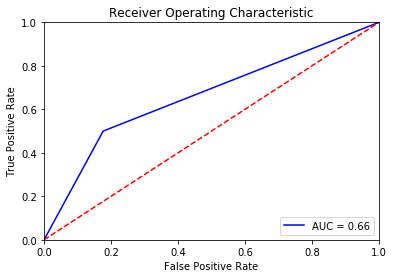

Scores: [70.73170731707317, 82.92682926829268, 70.73170731707317, 80.48780487804879, 63.41463414634146]
Mean Accuracy for sonar dataset: 73.659%
Confusion matrix
[[14  3]
 [12 12]]


In [3]:
def main():
    seed(1)
    # load and prepare data
    filename = 'sonar_dataset.csv'
    dataset = load_csv(filename)
    for i in range(len(dataset[0])-1):
        str_column_to_float(dataset, i)
    # convert string class to integers
    str_column_to_int(dataset, len(dataset[0])-1)
    # evaluate algorithm
    n_folds = 5
    l_rate = 0.01
    n_epoch = 500
    scores, mat = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
    print('Scores: %s' % scores)
    print('Mean Accuracy for sonar dataset: %.3f%%' % (sum(scores)/float(len(scores))))
    print("Confusion matrix")
    print(mat)
    
#     print(evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch))
    
    

main()

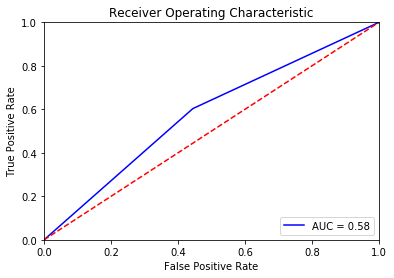

Scores: [69.73684210526315, 52.63157894736842, 73.68421052631578, 59.210526315789465]
Mean Accuracy: 63.816%
[[10  8]
 [23 35]]


In [4]:
def main():
    seed(1)
    # load and prepare data
    filename = 'pca_data/haberman_pca.csv'
    dataset = load_csv(filename)
    for i in range(len(dataset[0])-1):
        str_column_to_float(dataset, i)
    # convert string class to integers
    str_column_to_int(dataset, len(dataset[0])-1)
    # evaluate algorithm
    n_folds = 4
    l_rate = 0.01
    n_epoch = 500
    scores, mat = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
    print(mat)

main()

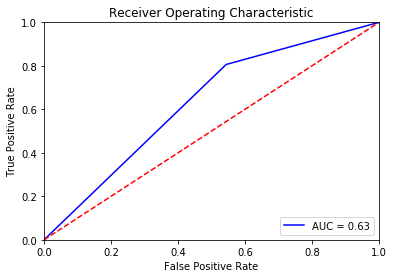

Scores: [76.20967741935483, 76.20967741935483, 72.58064516129032]
Mean Accuracy: 75.000%
confusion matrix
[[ 26  31]
 [ 37 154]]


In [6]:
def main():
    seed(1)
    # load and prepare data
    filename = 'blood_transfusion.csv'
    dataset = load_csv(filename)
    for i in range(len(dataset[0])-1):
        str_column_to_float(dataset, i)
    # convert string class to integers
    str_column_to_int(dataset, len(dataset[0])-1)
    # evaluate algorithm
    n_folds = 3
    l_rate = 0.01
    n_epoch = 500
    scores, mat = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
    print("confusion matrix")
    print(mat)
main()

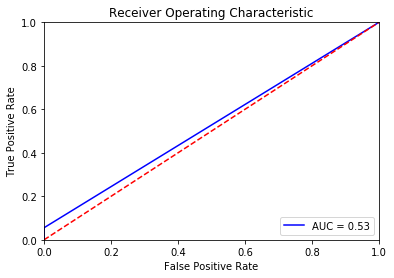

Scores: [74.19354838709677, 69.35483870967742, 79.43548387096774]
Mean Accuracy: 74.328%
confusion matrix
[[194   0]
 [ 51   3]]


In [9]:
def main():
    seed(1)
    # load and prepare data
    filename = 'blood_tranfusion_pca.csv'
    dataset = load_csv(filename)
    for i in range(len(dataset[0])-1):
        str_column_to_float(dataset, i)
    # convert string class to integers
    str_column_to_int(dataset, len(dataset[0])-1)
    # evaluate algorithm
    n_folds = 3
    l_rate = 0.01
    n_epoch = 500
    scores, mat = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
    print("confusion matrix")
    print(mat)
main()

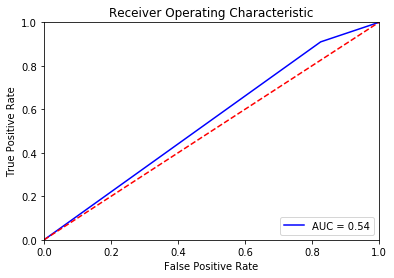

Scores: [71.28712871287128, 73.26732673267327, 74.25742574257426]
Mean Accuracy: 72.937%
confusion matrix
[[ 4 19]
 [ 7 71]]


In [6]:
def main():
    seed(1)
    # load and prepare data
    filename = 'pca_data/haberman_pca.csv'
    dataset = load_csv(filename)
    for i in range(len(dataset[0])-1):
        str_column_to_float(dataset, i)
    # convert string class to integers
    str_column_to_int(dataset, len(dataset[0])-1)
    # evaluate algorithm
    n_folds = 3
    l_rate = 0.01
    n_epoch = 500
    scores, mat = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
    print("confusion matrix")
    print(mat)
main()